# Análise dos pacientes sem os exames

In [40]:
import os
import folium
import pandas as pd
import matplotlib.pyplot as plt
from folium.plugins import HeatMap

# Lendo Dados

In [41]:
path = '../Dados/'

In [42]:
s_exames = pd.read_csv(f'{path}SirioLibanes/HSL Dataset final/hsl_lab_result_1.csv', sep='|', engine='python')
s_pacientes = pd.read_csv(f'{path}SirioLibanes/HSL Dataset final/hsl_patient_1.csv', sep='|', engine='python')

s_pacientes.columns = map(str.lower, s_pacientes.columns)
pacientes = s_pacientes

# Quantidade

In [121]:
pacientes.shape

(2731, 8)

# Valores Faltantes

- Apenas dados de localização estão faltando. Os dados sobre Distrito só estão preenchidos na tabela do Fleury

In [43]:
pacientes.head()

,id_paciente,ic_sexo,aa_nascimento,cd_pais,cd_uf,cd_municipio,cd_cep
0,8DB6195FDA56EFEB7458E3B9EFD2761D,F,1978,Brasil,SP,SAO PAULO,CCCC
1,7138E7E758F88CD2050CBEB35664B3A3,M,1944,Brasil,SP,MMMM,CCCC
2,B978D21B8B4F49DA5953AB488C9B0B11,M,1974,Brasil,SP,SAO PAULO,CCCC
3,11B85F4A508BF2FA4DB48A6E530C2A5B,F,1989,Brasil,SP,MMMM,CCCC
4,2632397D7F0CC660C98465D4916D09E1,M,1937,Brasil,SP,MMMM,CCCC


In [44]:
pacientes.isna().sum()

id_paciente       0
ic_sexo           0
aa_nascimento     0
cd_pais          48
cd_uf            29
cd_municipio      0
cd_cep            0
dtype: int64

# Checando valores diferentes

## Renomeando Cidades

- Valores passam a não ter acentos e ter tipo Título

In [45]:
pacientes['cd_municipio'].unique()

array(['SAO PAULO', 'MMMM', 'Sao Paulo', 'GUARULHOS', 'Guarulhos'],
      dtype=object)

In [46]:
pacientes['cd_municipio'] = pacientes['cd_municipio'].str.replace('ã', 'a')
pacientes['cd_municipio'] = pacientes['cd_municipio'].str.title()

In [47]:
pacientes['cd_municipio'].unique()

array(['Sao Paulo', 'Mmmm', 'Guarulhos'], dtype=object)

Muitos municipios tem o nome Mmmm. Esses municipios sem nome estão em todos os estados e nenhum tem cep

In [48]:
pacientes[pacientes['cd_municipio'] == 'Mmmm']

,id_paciente,ic_sexo,aa_nascimento,cd_pais,cd_uf,cd_municipio,cd_cep
1,7138E7E758F88CD2050CBEB35664B3A3,M,1944,Brasil,SP,Mmmm,CCCC
3,11B85F4A508BF2FA4DB48A6E530C2A5B,F,1989,Brasil,SP,Mmmm,CCCC
4,2632397D7F0CC660C98465D4916D09E1,M,1937,Brasil,SP,Mmmm,CCCC
5,DDE9B798AE77982101C3291C2DE47074,M,1949,Brasil,SP,Mmmm,CCCC
7,CEE3F1F84D815BF27341E5F37F249D31,F,1972,Brasil,SP,Mmmm,CCCC
...,...,...,...,...,...,...,...
2722,33FE5804D62583C11445078AA6FF7230,F,1975,Brasil,SP,Mmmm,CCCC
2725,0B257F255542AD11B2D4D535718B2AE6,M,1949,Brasil,SP,Mmmm,CCCC
2726,A67C8C9A961B4182688768DD9BA015FE,M,1965,Brasil,SP,Mmmm,CCCC
2727,6532AD672B061E76A6C03986C79612E5,M,1937,Brasil,SP,Mmmm,CCCC


In [49]:
pacientes[pacientes['cd_municipio'] == 'Mmmm']['cd_uf'].unique()

array(['SP', 'PA', 'DF', 'MG', 'sp', 'AM', 'PR', nan, 'RJ', 'PE', 'GO',
       'ES', 'RO', 'SC', 'MA', 'PI', 'BA', 'AL', 'SE', 'MS', 'EX', 'MT',
       'AP', 'Sp', 'AC', 'CE'], dtype=object)

## Renomeando UF

In [50]:
pacientes['cd_uf'] = pacientes['cd_uf'].str.upper()

In [51]:
pacientes['cd_uf'].unique()

array(['SP', 'PA', 'DF', 'MG', 'AM', 'PR', nan, 'RJ', 'PE', 'GO', 'ES',
       'RO', 'SC', 'MA', 'PI', 'BA', 'AL', 'SE', 'MS', 'EX', 'MT', 'AP',
       'AC', 'CE'], dtype=object)

## Renomeando País

In [52]:
pacientes['cd_pais'].unique()

array(['Brasil', nan, 'AfeganistĂŁo', 'Filipinas', 'Alemanha'],
      dtype=object)

In [53]:
pacientes[pacientes['cd_pais'].isna()]

,id_paciente,ic_sexo,aa_nascimento,cd_pais,cd_uf,cd_municipio,cd_cep
160,2CAEFD672A1B0FFC501416CF98315D3E,F,1990,NaN,SP,Sao Paulo,CCCC
239,C7EC1529BFF93E459099499C487735DD,F,1968,NaN,NaN,Mmmm,CCCC
243,E1F286DABE4A2E932A4BAC0F172EEA72,F,1986,NaN,SP,Sao Paulo,CCCC
286,8B01F0BF51AA6A10ED5C6407463A627A,F,1992,NaN,SP,Mmmm,CCCC
287,B8E883D163141B17B507645883D99B94,M,1988,NaN,SP,Mmmm,CCCC
290,663F7565BD4CEE5358C77AE85156C70C,M,1995,NaN,NaN,Mmmm,CCCC
299,00EC87C41DE33FF1876E5722D68C8B60,F,1976,NaN,SP,Sao Paulo,CCCC
303,239FBBEFB896AC03012A325D15705185,F,1946,NaN,DF,Mmmm,CCCC
317,277E83942AE487287A674D5AA14F8C77,M,1986,NaN,SP,Sao Paulo,CCCC
328,B8326EF1CFAF8D4A084C69F9E5F9955B,M,1977,NaN,SP,Sao Paulo,CCCC


In [57]:
pacientes[pacientes['cd_pais'].isna()]

,id_paciente,ic_sexo,aa_nascimento,cd_pais,cd_uf,cd_municipio,cd_cep
239,C7EC1529BFF93E459099499C487735DD,F,1968,NaN,NaN,Mmmm,CCCC
290,663F7565BD4CEE5358C77AE85156C70C,M,1995,NaN,NaN,Mmmm,CCCC
553,325B22C2223F6EA12BB08ADDF37EC161,F,1994,NaN,NaN,Mmmm,CCCC
642,36A410EDE6CA5ACF05DB1CB1EC457924,M,1989,NaN,NaN,Mmmm,CCCC
997,65BCC2E313DA55B1BB514BF8777264C6,M,1979,NaN,NaN,Mmmm,CCCC
1207,0ADC16593333D6122089A088DED45D9E,F,1964,NaN,NaN,Mmmm,CCCC
1534,591010ED60FDDB788F01481F07F5EA99,F,1972,NaN,NaN,Mmmm,CCCC
1635,49F3F31D96F5AD8ED7DD01CD4906FC36,F,1985,NaN,NaN,Mmmm,CCCC
1637,63B23DD849F820751635C91AD4AF7802,M,1985,NaN,NaN,Mmmm,CCCC
1928,C70E894AF7336E5F4C3C2A9A3C8965E4,F,1971,NaN,NaN,Mmmm,CCCC


Substituindo pais nulo por Brasil nos exemplos quem tem estado

In [58]:
pacientes.loc[(pacientes['cd_pais'].isna()) & ~(pacientes['cd_uf'].isna()), 'cd_pais'] = 'Brasil'

In [59]:
pacientes.isna().sum()

id_paciente       0
ic_sexo           0
aa_nascimento     0
cd_pais          15
cd_uf            29
cd_municipio      0
cd_cep            0
dtype: int64

## Renomeando CEP

Todos os ceps são CCCC

In [62]:
pacientes['cd_cep'].unique()

array(['CCCC'], dtype=object)

## Ano de nascimento

In [69]:
pacientes['aa_nascimento'].unique()

array(['1978', '1944', '1974', '1989', '1937', '1949', '1970', '1972',
       '1973', '1975', '1982', '1958', '1950', '1984', '1964', '1971',
       '1965', '1977', '1980', '1981', '1987', 'AAAA', '1934', '1983',
       '1945', '1951', '1954', '1992', '1990', '1986', '1968', '1963',
       '1961', '1999', '1941', '1956', '1994', '1933', '1969', '1966',
       '1947', '1988', '1959', '1997', '1991', '1979', '1946', '1957',
       '1955', '1976', '1996', '1985', '2000', '1995', '1993', '1960',
       '1998', '1942', '1962', '1952', '1967', '1940', '1948', '1953',
       '1938', '1936', '1943', '2005'], dtype=object)

In [79]:
pacientes[pacientes['aa_nascimento'] == 'AAAA'].count()

id_paciente      35
ic_sexo          35
aa_nascimento    35
cd_pais          35
cd_uf            34
cd_municipio     35
cd_cep           35
dtype: int64

In [74]:
pacientes[pacientes['aa_nascimento'] == 'AAAA']

,id_paciente,ic_sexo,aa_nascimento,cd_pais,cd_uf,cd_municipio,cd_cep
27,2011A992C4697C6F788B177FE2C55A47,F,AAAA,Brasil,SP,Sao Paulo,CCCC
153,58B919C5700DE4A866682D5C49AE2644,F,AAAA,Brasil,SP,Sao Paulo,CCCC
283,2417AF2D8A05E7DF5E8D917E0D363DEC,F,AAAA,Brasil,DF,Mmmm,CCCC
318,87D0DF35EA2D504FA30F81E84ACB8EF4,M,AAAA,Brasil,SP,Sao Paulo,CCCC
514,71E9630E4619222EDFA9309D26B06A80,F,AAAA,Brasil,SP,Mmmm,CCCC
723,FAE2ECD99C0059F4D911526AC2755F5F,F,AAAA,Brasil,SP,Sao Paulo,CCCC
933,EAD3B9C88615E1D9E438F10A9E428145,F,AAAA,Brasil,SP,Sao Paulo,CCCC
1018,145F22E37C4C6D0965029B3FDC11A3B5,M,AAAA,Brasil,SP,Sao Paulo,CCCC
1028,21B87DA0B5E900224D034469833D5FE5,M,AAAA,Brasil,SP,Sao Paulo,CCCC
1043,86E33D550DC162366A02003089AB9894,F,AAAA,Brasil,NaN,Mmmm,CCCC


# Analisando Gênero 

## Sem cidade

In [63]:
pacientes.groupby('ic_sexo', as_index=False)['id_paciente'].count()

,ic_sexo,id_paciente
0,F,1351
1,M,1380


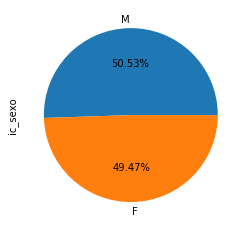

In [73]:
pacientes['ic_sexo'].value_counts().plot(kind='pie', autopct='%.2f%%');

## Com cidade

In [65]:
pacientes.groupby(['cd_municipio', 'ic_sexo'], as_index=False)['id_paciente'].count()

,cd_municipio,ic_sexo,id_paciente
0,Guarulhos,F,7
1,Mmmm,F,554
2,Mmmm,M,667
3,Sao Paulo,F,790
4,Sao Paulo,M,713


In [66]:
pd.crosstab(pacientes['ic_sexo'], pacientes['cd_municipio'])

cd_municipio,Guarulhos,Mmmm,Sao Paulo
ic_sexo,,,
F,7,554,790
M,0,667,713


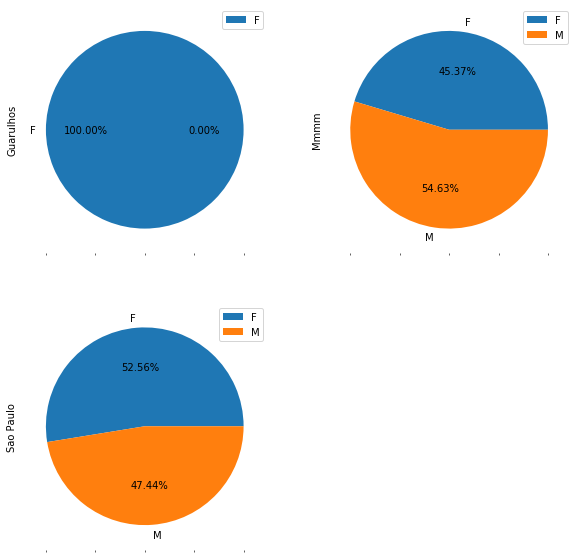

In [67]:
cols = 2
rows = (pacientes['cd_municipio'].nunique() + cols) // cols
pd.crosstab(pacientes['ic_sexo'], pacientes['cd_municipio']).plot(kind='pie', autopct='%.2f%%', subplots=True, figsize=(10,10), layout=(rows,cols));

# Analisando Ano de Nascimento / Idade

In [99]:
pacientes_clean = pacientes[pacientes['aa_nascimento'] != 'AAAA']

In [105]:
idades = 2020 - pacientes_clean['aa_nascimento'].astype(int)

In [106]:
pacientes['idade'] = idades

## Máximo e Mínimo

In [107]:
pacientes_clean['idade'].max()

87

In [108]:
pacientes_clean['idade'].min()

15

## Quantidade

In [109]:
pacientes_clean.groupby('idade', as_index=False)['id_paciente'].count()

,idade,id_paciente
0,15,5
1,20,15
2,21,25
3,22,31
4,23,43
...,...,...
62,82,5
63,83,6
64,84,5
65,86,8


## Histograma

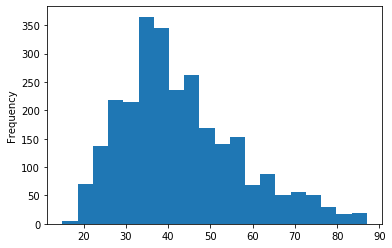

In [111]:
pacientes_clean['idade'].plot(kind='hist', bins=20)

## Distribuição das idades por cidade

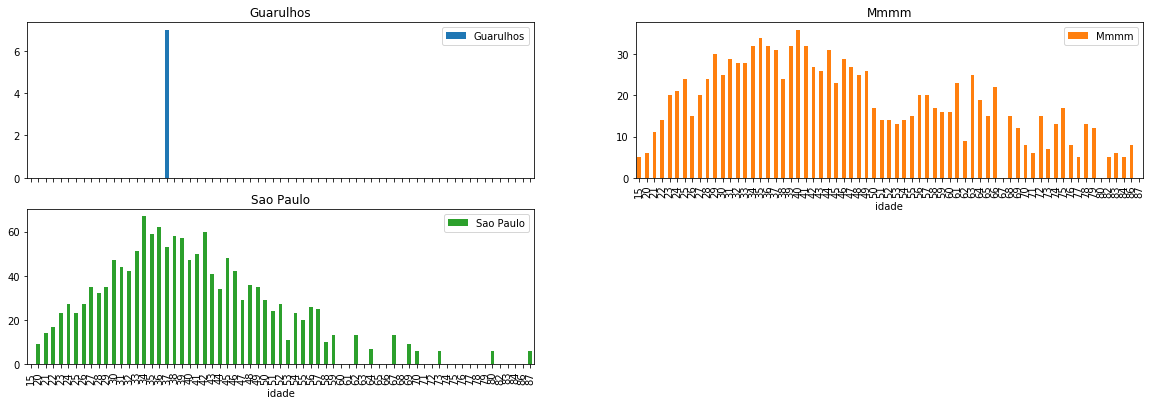

In [112]:
pd.crosstab(pacientes_clean['idade'], pacientes_clean['cd_municipio']).plot(kind='bar', subplots=True, figsize=(20,20), layout=(6,2));

# Analisando Cidades

In [113]:
detalhes = pd.read_csv('BRAZIL_CITIES.csv', usecols=['CITY', 'STATE', 'LONG', 'LAT'], sep=';')
# detalhes = detalhes[detalhes['STATE'] == 'SP']
# detalhes = detalhes.drop('STATE', axis=1)
detalhes['CITY'] = detalhes['CITY'].str.replace('ã', 'a')
detalhes['CITY'] = detalhes['CITY'].str.replace('á', 'a')
detalhes['CITY'] = detalhes['CITY'].str.replace('í', 'i')
detalhes['CITY'] = detalhes['CITY'].str.replace('ç', 'c')
detalhes['CITY'] = detalhes['CITY'].str.replace('é', 'e')
pacientes_cidades = pacientes.merge(detalhes, left_on=['cd_municipio', 'cd_uf'], right_on=['CITY', 'STATE'])

In [114]:
mapa = folium.Map(location=[-23.2, -46.3], zoom_start=9)
cidades = list(pacientes_cidades['CITY'])
latitudes = list(pacientes_cidades['LAT'])
longitudes = list(pacientes_cidades['LONG'])

for cid, lat, lng in zip(cidades, latitudes, longitudes):
    folium.Marker(location=[lat, lng], tooltip=[cid, lat, lng]).add_to(mapa)

mapa

In [115]:
heat_map = folium.Map(location=[-23.2, -46.3], zoom_start=9)
HeatMap(data=pacientes_cidades[['LAT', 'LONG']], radius=15, max_zoom=13).add_to(heat_map)
heat_map

# Analisando Estados

In [117]:
pacientes['cd_uf'].unique()

array(['SP', 'PA', 'DF', 'MG', 'AM', 'PR', nan, 'RJ', 'PE', 'GO', 'ES',
       'RO', 'SC', 'MA', 'PI', 'BA', 'AL', 'SE', 'MS', 'EX', 'MT', 'AP',
       'AC', 'CE'], dtype=object)

### Quantidade Fora de São Paulo

In [118]:
pacientes[(pacientes['cd_uf'] != 'SP') & (pacientes['cd_uf'] != 'Sp') & (pacientes['cd_uf'] != 'sp')].shape

(316, 8)

### Quantidade em São Paulo

In [119]:
pacientes[(pacientes['cd_uf'] == 'SP') | (pacientes['cd_uf'] == 'Sp') | (pacientes['cd_uf'] == 'sp')].shape

(2415, 8)

# Analisando País

In [120]:
pacientes['cd_pais'].unique()

array(['Brasil', 'AfeganistĂŁo', nan, 'Filipinas', 'Alemanha'],
      dtype=object)